In [26]:
import os
import sys
AbsPath = os.path.abspath("")
STEEL_Path = AbsPath+"/../.."
sys.path.append(AbsPath+"/../..")
import numpy as np
from itertools import cycle
import matplotlib as mpl
import matplotlib.pyplot as plt
import pickle
from colossus.cosmology import cosmology
cosmology.setCosmology("planck15")
Cosmo =cosmology.getCurrent()

In [2]:
#set plot paramaters here
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['ytick.minor.visible']=True
plt.rcParams['xtick.minor.visible']=True
plt.rcParams['axes.linewidth']=2
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
mpl.rcParams['axes.titlepad'] = 20

plt.rcParams['font.size']=15

/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/home/pg1g15/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [65]:
Data = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE.npy")
Data_M = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE_M.npy")
Data_SFR = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE_SFR.npy")
Data_z = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/HaloMassTrackCE_Z.npy")

GalaxyMassTrack10 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks9.9.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack10[0], 0, 5).mask
GalaxyMass10 = np.log10(GalaxyMassTrack10[1][Mask])
Galaxy10SFR = np.log10(GalaxyMassTrack10[2] + GalaxyMassTrack10[3])[Mask]

GalaxyMassTrack10p5 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks10.4.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack10p5[0], 0, 5).mask
GalaxyMass10p5 = np.log10(GalaxyMassTrack10p5[1][Mask])
Galaxy10p5SFR = np.log10(GalaxyMassTrack10p5[2] + GalaxyMassTrack10p5[3])[Mask]


GalaxyMassTrack11 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11[0], 0, 5).mask
GalaxyMass11 = np.log10(GalaxyMassTrack11[1][Mask])
Galaxy11SFR = np.log10(GalaxyMassTrack11[2] + GalaxyMassTrack11[3])[Mask]

GalaxyMassTrack11p5 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks11.5.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack11p5[0], 0, 5).mask
GalaxyMass11p5 = np.log10(GalaxyMassTrack11p5[1][Mask])
Galaxy11p5SFR = np.log10(GalaxyMassTrack11p5[2] + GalaxyMassTrack11p5[3])[Mask]

GalaxyMassTrack12 = np.load(STEEL_Path+"/Scripts/CentralPostprocessing/GalaxyTracks12.0.npy")
Mask = np.ma.masked_inside(GalaxyMassTrack12[0], 0, 5).mask
GalaxyMass12 = np.log10(GalaxyMassTrack12[1][Mask])
Galaxy12SFR = np.log10(GalaxyMassTrack12[2] + GalaxyMassTrack12[3])[Mask]


GalaxyMassTrack_z = GalaxyMassTrack12[0][Mask]

In [4]:
#Fetching the Leja Prospector SFR
Lpt5=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z0.5.dat", skiprows = 1)
L1=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z1.dat", skiprows = 1)
L2=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z2.dat", skiprows = 1)


def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.7 + 0.35*z - 0.08*(z**2))
    Norm = 0.75 + 0.71*z - 0.086*(z**2)
    Alpha = 1.03 - 0.019*z + 0.007*(z**2)#
    Beta = 1.5 - 0.23*z - 0.045*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.65 + 0.34*z - 0.079*(z**2))
    Norm = 0.69 + 0.71*z - 0.087*(z**2)
    Alpha = 1.0 - 0.022*z + 0.008*(z**2)
    Beta = 1.8 - 0.7*z + 0.035*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

In [5]:
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.65 + 0.33*z - 0.08*(z**2))
    Norm = 0.69 + 0.71*z - 0.088*(z**2)
    Alpha = 1.0 - 0.022*z + 0.009*(z**2)
    Beta = 1.8 - 1.0*z + 0.1*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log10


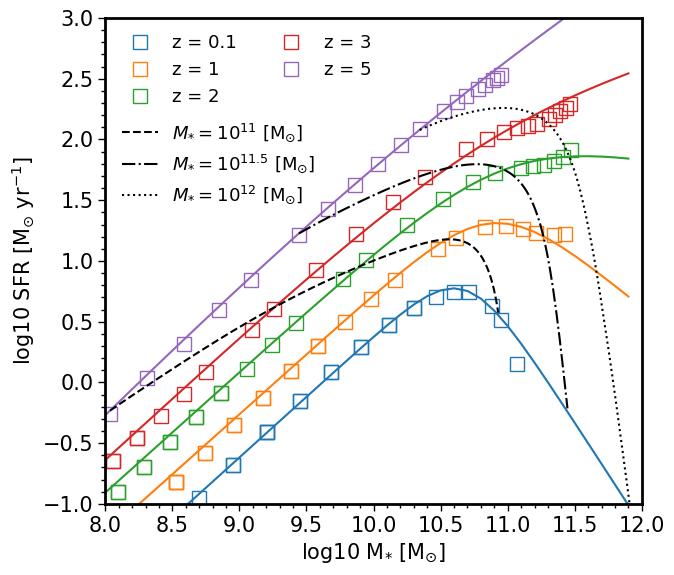

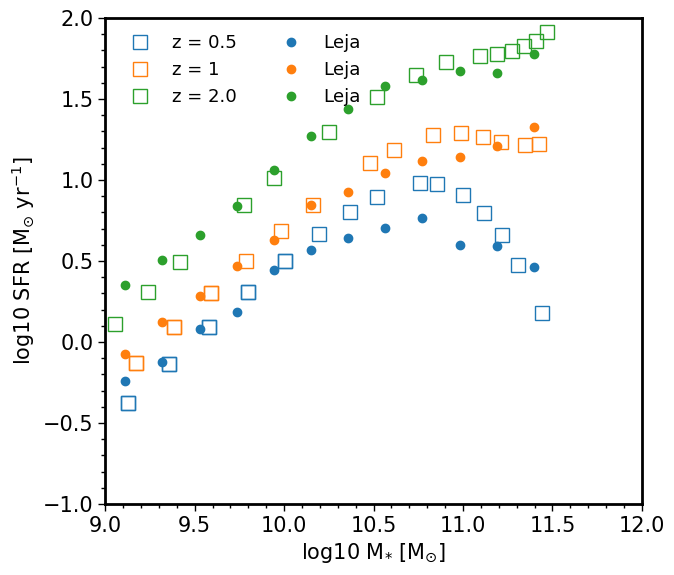

In [10]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [7,6])

"""
for Redshift in [0.5, 1, 2.0]:#[0.1,0.5, 1, 2, 3,5]:#[0.1,0.75, 1.25, 1.75, 2.25]:#
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask]), "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none")
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
    #plt.plot(M, S15(M, Redshift), "--", color = colour)
    #plt.plot(M, T16(M, Redshift), "-.", color = colour)
#plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")
"""
Leg1 = []
Leg2 = []
for Redshift in [0.1,1, 2, 3,5]:#[0.1,0.75, 1.25, 1.75, 2.25]:#
    colour = next(colourcycler)
    """z = Redshift
    M_n = 10.65 - 0.1*z #- 0.05*(z**2)
    Norm = 0.69 + 0.5*z - 0.05*(z**2)"""
    z_fac = (Redshift-0.1/1+Redshift)
    M_n = 10.675 - 0.01*z_fac
    Norm = 0.75 + 0.2*z_fac
    #plt.plot(M_n, Norm, "o", color = colour)
    Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
    Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
    Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))

    Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
    Leg1.append(\
                plt.plot(Mean_M[Mask0], Mean_SFR[Mask0],\
                "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none", markersize=10)[0]\
               )
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
    

Leg2.append(plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")[0])
Leg2.append(plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")[0])
Leg2.append(plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")[0])


plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
plt.ylim(-1, 3)
plt.tight_layout()


first_legend = plt.legend(handles=Leg2, loc=6, frameon = False, ncol = 1, fontsize = 13, bbox_to_anchor = (0,0.7))
ax = plt.gca().add_artist(first_legend)
plt.legend(handles = Leg1, frameon = False, ncol = 2, loc = 2, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL.pdf")
plt.show()

colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
plt.figure(figsize = [7,6])
for Redshift in [0.5, 1, 2.0]:
    colour = next(colourcycler)
    
    Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
    Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
    Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))

    Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
    plt.plot(Mean_M[Mask0], Mean_SFR[Mask0], "s", label = "z = {}".format(Redshift), color = colour, mfc = None, fillstyle = "none", markersize=10)
    #plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = colour)
#plt.plot(GalaxyMass11, Galaxy11SFR, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
#plt.plot(GalaxyMass12, Galaxy12SFR, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")

#Leja
plt.plot(Lpt5[:,0], np.log10(Lpt5[:,1]), "o",label = "Leja")
plt.plot(L1[:,0], np.log10(L1[:,1]), "o",label = "Leja")
plt.plot(L2[:,0], np.log10(L2[:,1]), "o",label = "Leja")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(9, 12)
plt.ylim(-1, 2)
plt.tight_layout()
plt.legend(frameon = False, ncol = 2, loc = 2, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_wLeja.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_wLeja.pdf")
plt.show()

/home/pg1g15/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


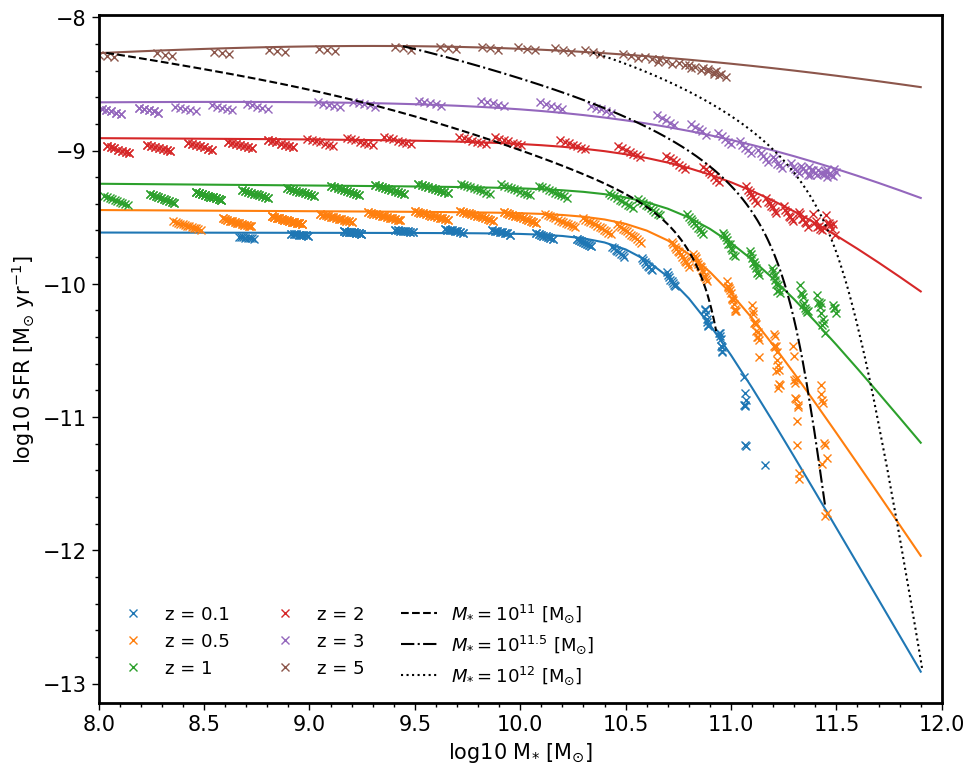

In [7]:
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
M = np.arange(7, 12, 0.1)
plt.figure(figsize = [10,8])
for Redshift in [0.1,0.5, 1, 2, 3,5]:
    colour = next(colourcycler)
    Mask0 = np.ma.masked_inside(np.log10(Data[0]), 8, 11.5).mask
    Mask1 = np.ma.masked_inside(Data[2], Redshift-0.1, Redshift+0.1).mask
    Mask = Mask0 * Mask1
    plt.plot(np.log10(Data[0][Mask]), np.log10(Data[1][Mask])-np.log10(Data[0][Mask]), "x", label = "z = {}".format(Redshift), color = colour)
    plt.plot(M, G19_SFR_DPL(M, Redshift)-M, "-", color = colour)
    #plt.plot(M, S15(M, Redshift)-M, "--", color = colour)
    #plt.plot(M, T16(M, Redshift)-M, "-.", color = colour)
plt.plot(GalaxyMass11, Galaxy11SFR - GalaxyMass11, "--", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR - GalaxyMass11p5, "-.", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass12, Galaxy12SFR - GalaxyMass12, ":", color = "k", label = r"$M_{*} = 10^{12}$ [M$_{\odot}$]")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(8, 12)
#plt.ylim(-2, 3)
plt.tight_layout()
plt.legend(frameon = False, ncol = 3, loc = 3, fontsize = 13)
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_sSFR.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_sSFR.pdf")
plt.show()

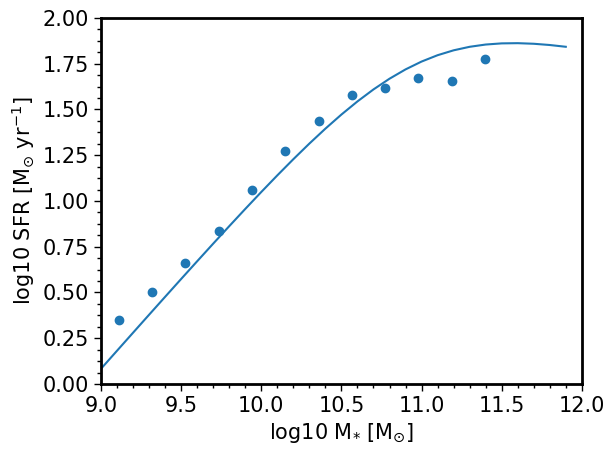

In [9]:
L2=np.loadtxt(STEEL_Path+"/Data/Observational/Leja_SFR/z2.dat", skiprows = 1)
def G19_SFR_DPL(M_out, z = 0.5):
    M_n = np.power(10, 10.65 + 0.33*z - 0.08*(z**2))
    Norm = 0.69 + 0.71*z - 0.088*(z**2)
    Alpha = 1.0 - 0.022*z + 0.009*(z**2)
    Beta = 1.8 - 1.0*z + 0.1*(z**2)
    MperY = 2*(10**Norm)*np.power( np.power(np.divide(10**M_out, M_n), -Alpha) + np.power(np.divide(10**M_out, M_n), Beta), -1)
    return np.log10(MperY)
for Redshift in [2.0]:
    colour = next(colourcycler)
    
    Mask1 = np.ma.masked_inside(Data_z[0], Redshift-0.1, Redshift+0.1).mask
    Mean_M = np.log10(np.mean(Data_M[:,Mask1], axis = 1))
    Mean_SFR = np.log10(np.mean(Data_SFR[:,Mask1], axis = 1))

    Mask0 = np.ma.masked_inside(Mean_M, 8, 11.5).mask
    plt.plot(M, G19_SFR_DPL(M, Redshift), "-", color = "C0")

#Leja
plt.plot(L2[:,0], np.log10(L2[:,1]), "oC0")

plt.ylabel("log10 SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel("log10 M$_{*}$ [M$_{\odot}$]")
plt.xlim(9, 12)
plt.ylim(-0.0, 2)
plt.tight_layout()
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_wLeja.png")
plt.savefig(STEEL_Path+"/Figures/Paper2/HMC_DPL_wLeja.pdf")
plt.show()

In [67]:
#Open the file from Joel
File = open(STEEL_Path+"/Data/Observational/Leja_SFR/sfh_stack_pip.pickle", "rb")
#Load the data from pickle, note latin1 required due to python 2 to python 3
Data = pickle.load(File, encoding='latin1')

#Calculate the SFR by multipying the median sSFR by the mass
SFR_06 = Data['0.6']['sfr_med']*np.power(10, np.full((7, np.size(Data['0.6']['mvec'])) , Data['0.6']['mvec']).T)
#Get the redshift of the SFH steps by calculating the total lookback time then convering back to redshift 
z_06 = Cosmo.lookbackTime(Cosmo.lookbackTime(0.6)+np.mean(10**Data['0.6']['agebins']/10**9, axis = 1), inverse = True)
#Calculate the SFR by multipying the median sSFR by the mass
SFR_1 = Data['1.0']['sfr_med']*np.power(10, np.full((7, np.size(Data['1.0']['mvec'])) , Data['1.0']['mvec']).T)
#Get the redshift of the SFH steps by calculating the total lookback time then convering back to redshift 
z_1 = Cosmo.lookbackTime(Cosmo.lookbackTime(1.0)+np.mean(10**Data['1.0']['agebins']/10**9, axis = 1), inverse = True)
#Calculate the SFR by multipying the median sSFR by the mass
SFR_2 = Data['2.0']['sfr_med']*np.power(10, np.full((7, np.size(Data['2.0']['mvec'])) , Data['2.0']['mvec']).T)
#Get the redshift of the SFH steps by calculating the total lookback time then convering back to redshift
z_2 = Cosmo.lookbackTime(Cosmo.lookbackTime(2.0)+np.mean(10**Data['2.0']['agebins']/10**9, axis = 1), inverse = True)

In [68]:
z_2

array([ 2.00933992,  2.04125927,  2.10773852,  2.26306503,  2.70667098,
        4.72952655, 18.0664124 ])

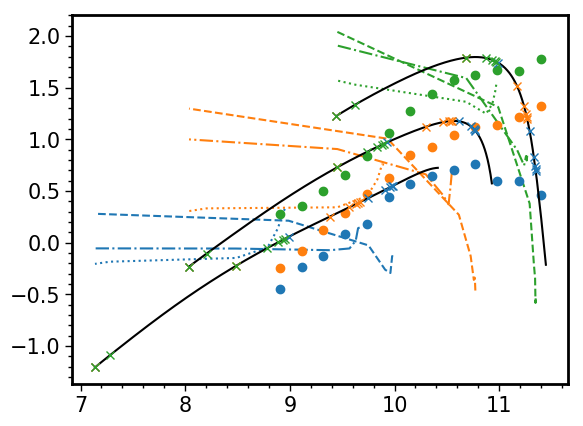

In [71]:
z_bins_pt6 = np.digitize(z_06,bins = GalaxyMassTrack_z) 
z_bins_1 = np.digitize(z_1,bins = GalaxyMassTrack_z)
z_bins_2 = np.digitize(z_2,bins = GalaxyMassTrack_z)

M_at_pt6 = np.array([GalaxyMass10p5[z_bins_pt6], GalaxyMass11[z_bins_pt6], GalaxyMass11p5[z_bins_pt6]])
M_at_1 = np.array([GalaxyMass10p5[z_bins_1], GalaxyMass11[z_bins_1], GalaxyMass11p5[z_bins_1]])
M_at_2 = np.array([GalaxyMass10p5[z_bins_2], GalaxyMass11[z_bins_2], GalaxyMass11p5[z_bins_2]])

M_bin_pt6 = np.digitize(M_at_pt6[:,0], bins = Data['0.6']['mvec'])
M_bin_1 = np.digitize(M_at_1[:,0], bins = Data['1.0']['mvec'])
M_bin_2 = np.digitize(M_at_2[:,0], bins = Data['2.0']['mvec'])


colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)
for i, Bin in enumerate(M_bin_pt6):
    colour = next(colourcycler)
    plt.plot(M_at_pt6[i], np.log10(SFR_06[Bin]), "--", color = colour)
    
    
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours) 
for i, Bin in enumerate(M_bin_1):
    colour = next(colourcycler)
    plt.plot(M_at_1[i], np.log10(SFR_1[Bin]), "-.", color = colour)
    
    
colours = ["C0", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "k"]
colourcycler = cycle(colours)    
for i, Bin in enumerate(M_bin_2):
    colour = next(colourcycler)
    plt.plot(M_at_2[i], np.log10(SFR_2[Bin]), ":", color = colour)
    
plt.plot(Lpt5[:,0], np.log10(Lpt5[:,1]), "o",label = "Leja")
plt.plot(L1[:,0], np.log10(L1[:,1]), "o",label = "Leja")
plt.plot(L2[:,0], np.log10(L2[:,1]), "o",label = "Leja")

plt.plot(GalaxyMass10p5, Galaxy10p5SFR, "-", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11, Galaxy11SFR, "-", color = "k", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5, Galaxy11p5SFR, "-", color = "k", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")

plt.plot(GalaxyMass10p5[z_bins_pt6], Galaxy10p5SFR[z_bins_pt6], "x", color = "C0", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11[z_bins_pt6], Galaxy11SFR[z_bins_pt6], "x", color = "C0", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5[z_bins_pt6], Galaxy11p5SFR[z_bins_pt6], "x", color = "C0", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass10p5[z_bins_1], Galaxy10p5SFR[z_bins_1], "x", color = "C1", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11[z_bins_1], Galaxy11SFR[z_bins_1], "x", color = "C1", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5[z_bins_1], Galaxy11p5SFR[z_bins_1], "x", color = "C1", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass10p5[z_bins_2], Galaxy10p5SFR[z_bins_2], "x", color = "C2", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11[z_bins_2], Galaxy11SFR[z_bins_2], "x", color = "C2", label = r"$M_{*} = 10^{11}$ [M$_{\odot}$]")
plt.plot(GalaxyMass11p5[z_bins_2], Galaxy11p5SFR[z_bins_2], "x", color = "C2", label = r"$M_{*} = 10^{11.5}$ [M$_{\odot}$]")

plt.show()

In [35]:
GalaxyMass10[z_bins_pt6]

array([9.35340839, 9.34590865, 9.33098443, 9.28701462, 9.14804651,
       8.51489909, 7.03110625])